In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,classification_report
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data_set=pd.read_csv('../dataset/cleaned_pneumonia_blood_dataset.csv')
data_set.drop('Unnamed: 0',axis=1,inplace=True)
data_set.head()

,Patient_ID,Age,Gender,White_Blood_Cell_Count,CRP_Level,Procalcitonin_Level,ESR_Level,Diagnosis,Cough,Shortness of Breath,Chest Pain,Chills,Fatigue,Productive Cough
0,1,48,Male,9261,6.10,0.34,23,0,0,1,1,0,0,0
1,2,21,Male,10200,8.17,0.28,17,0,0,0,0,1,1,1
2,3,62,Female,14957,17.31,0.81,21,0,1,0,0,0,1,0
3,4,59,Female,12014,7.86,0.36,29,1,1,1,1,1,0,0
4,5,43,Female,13237,7.96,0.47,30,0,0,0,0,1,0,0


In [29]:
#shuffle data
data_set=data_set.sample(frac=1)#frac=1 means 100% data (.25 means 25% data)
data_set.head()

,Patient_ID,Age,Gender,White_Blood_Cell_Count,CRP_Level,Procalcitonin_Level,ESR_Level,Diagnosis,Cough,Shortness of Breath,Chest Pain,Chills,Fatigue,Productive Cough
1333,1334,25,Female,9159,13.21,0.82,34,0,0,1,1,1,0,0
1886,1887,42,Female,13307,3.69,0.41,40,1,1,0,1,0,0,1
3512,3513,61,Female,11292,6.76,0.68,19,1,0,1,0,1,1,0
1715,1716,65,Male,10316,6.25,0.28,13,0,1,0,1,0,0,1
1107,1108,70,Female,14633,17.99,0.51,40,1,1,0,1,1,0,0


In [30]:
#loading dataset
X,y=data_set.drop(['Patient_ID','Diagnosis','Gender'],axis=1),data_set['Diagnosis']
# splitting dataset into training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y) 

>**Model selection** 

**Logistic Regression**

In [31]:
reg_model=LogisticRegression(max_iter=1000)
reg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Prediction
y_pred = reg_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 78.88482632541134


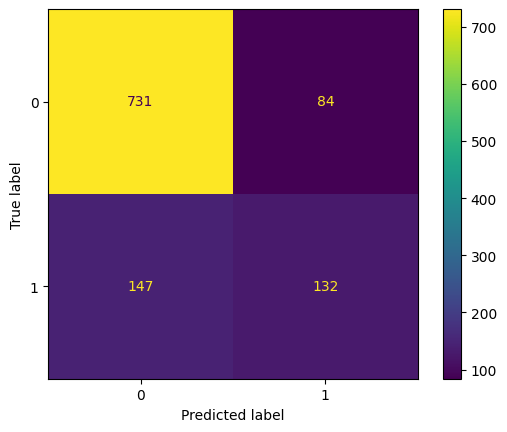

In [33]:
confusion_matrix_reg=confusion_matrix(y_test,y_pred,labels=reg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_reg,display_labels=reg_model.classes_)
disp.plot()

In [34]:
#calculating Classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       815
           1       0.61      0.47      0.53       279

    accuracy                           0.79      1094
   macro avg       0.72      0.69      0.70      1094
weighted avg       0.78      0.79      0.78      1094



**Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeRegressor  
DecisionTree_model = DecisionTreeRegressor(max_leaf_nodes=10000)  
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10000)

In [36]:
y_pred = DecisionTree_model.predict(X_test) 
print(f"Predicted price: {accuracy_score(y_test, y_pred)*100}")  

Predicted price: 85.37477148080438


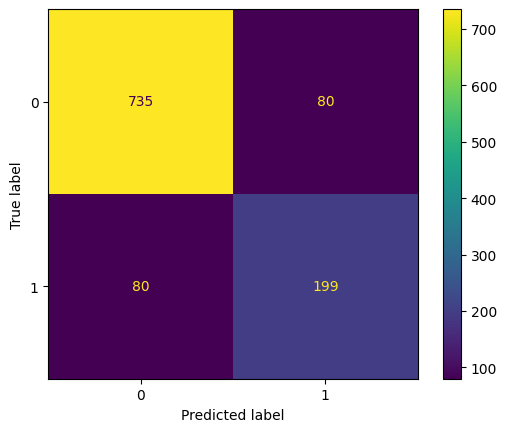

In [37]:
confusion_matrix_decision_tree=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_decision_tree)
disp.plot()

In [38]:
#calculating Classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       815
           1       0.71      0.71      0.71       279

    accuracy                           0.85      1094
   macro avg       0.81      0.81      0.81      1094
weighted avg       0.85      0.85      0.85      1094



**Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(max_leaf_nodes=10000)
Rfc.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=10000)

In [40]:
y_pred = Rfc.predict(X_test)
print(f"Predicted price: {accuracy_score(y_test, y_pred)*100}") 

Predicted price: 88.75685557586837


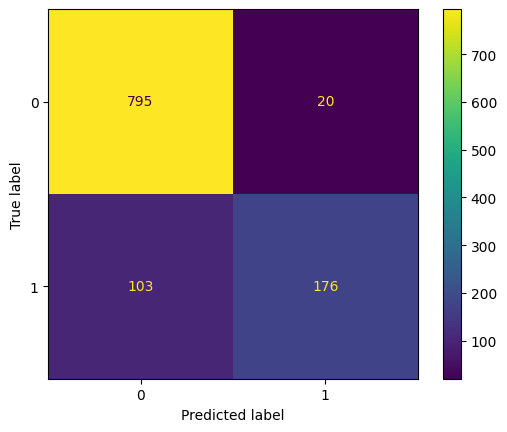

In [41]:
confusion_matrix_Rfc=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_Rfc)
disp.plot()

In [42]:
#calculating Classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       815
           1       0.90      0.63      0.74       279

    accuracy                           0.89      1094
   macro avg       0.89      0.80      0.83      1094
weighted avg       0.89      0.89      0.88      1094



In [43]:
#saving all the models
import pickle
pickle.dump(reg_model,file=open('./models/Logistic_Regression_model.pkl','wb'))
pickle.dump(reg_model,file=open('./models/DecisionTree_model.pkl','wb'))
pickle.dump(reg_model,file=open('./models/RandomForest__model.pkl','wb'))